In [3]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import string

In [6]:
df = pd.read_csv('datasets/amazonreviews.tsv', sep='\t')
df.head(3)

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...


In [5]:
#df.loc[2]['review']

#### 1. Lowercasing

In [11]:
df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
df.head(3)

,label,review
0,pos,stuning even for the non-gamer: this sound tra...
1,pos,the best soundtrack ever to anything.: i'm rea...
2,pos,amazing!: this soundtrack is my favorite music...


#### 2. Remove URLs, mentions, hashtags, emojis, and special characters

In [9]:
import re
##    re.sub(pattern, repl, string, count=0, flags=0)
df['review'] = df['review'].apply(lambda x: re.sub(r"http\S+|www\S+|https\S+", '', x, flags=re.MULTILINE))
df['review'] = df['review'].apply(lambda x: re.sub(r'\@\w+|\#\w+', '', x))
df['review'] = df['review'].apply(lambda x: re.sub(r'[^\w\s]', '', x) )                                

In [13]:
df.loc[2]['review']

'amazing!: this soundtrack is my favorite music of all time, hands down. the intense sadness of "prisoners of fate" (which means all the more if you\'ve played the game) and the hope in "a distant promise" and "girl who stole the star" have been an important inspiration to me personally throughout my teen years. the higher energy tracks like "chrono cross ~ time\'s scar~", "time of the dreamwatch", and "chronomantique" (indefinably remeniscent of chrono trigger) are all absolutely superb as well.this soundtrack is amazing music, probably the best of this composer\'s work (i haven\'t heard the xenogears soundtrack, so i can\'t say for sure), and even if you\'ve never played the game, it would be worth twice the price to buy it.i wish i could give it 6 stars.'

#### 3. Remove Stopwords

In [17]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
#df.loc[2]['review']

In [19]:
def remove_stopwords(x):
    lst = x.split()
    new_lst = [word  for word in lst if word not in stopwords]
    return ' '.join(new_lst)

df['review'] = df['review'].apply(remove_stopwords)
df.loc[2]['review']

'amazing!: soundtrack favorite music time, hands down. intense sadness "prisoners fate" (which means played game) hope "a distant promise" "girl stole star" important inspiration personally throughout teen years. higher energy tracks like "chrono cross ~ time\'s scar~", "time dreamwatch", "chronomantique" (indefinably remeniscent chrono trigger) absolutely superb well.this soundtrack amazing music, probably best composer\'s work (i heard xenogears soundtrack, can\'t say sure), even never played game, would worth twice price buy it.i wish could give 6 stars.'

#### 4. Tokenization

In [21]:
#tokens = nltk.word_tokenize(df['review'])
df['review'] = df['review'].apply(lambda x: nltk.word_tokenize(x))
df.loc[2]['review']

['amazing',
 '!',
 ':',
 'soundtrack',
 'favorite',
 'music',
 'time',
 ',',
 'hands',
 'down',
 '.',
 'intense',
 'sadness',
 '``',
 'prisoners',
 'fate',
 "''",
 '(',
 'which',
 'means',
 'played',
 'game',
 ')',
 'hope',
 '``',
 'a',
 'distant',
 'promise',
 "''",
 '``',
 'girl',
 'stole',
 'star',
 "''",
 'important',
 'inspiration',
 'personally',
 'throughout',
 'teen',
 'years',
 '.',
 'higher',
 'energy',
 'tracks',
 'like',
 '``',
 'chrono',
 'cross',
 '~',
 'time',
 "'s",
 'scar~',
 "''",
 ',',
 '``',
 'time',
 'dreamwatch',
 "''",
 ',',
 '``',
 'chronomantique',
 "''",
 '(',
 'indefinably',
 'remeniscent',
 'chrono',
 'trigger',
 ')',
 'absolutely',
 'superb',
 'well.this',
 'soundtrack',
 'amazing',
 'music',
 ',',
 'probably',
 'best',
 'composer',
 "'s",
 'work',
 '(',
 'i',
 'heard',
 'xenogears',
 'soundtrack',
 ',',
 'ca',
 "n't",
 'say',
 'sure',
 ')',
 ',',
 'even',
 'never',
 'played',
 'game',
 ',',
 'would',
 'worth',
 'twice',
 'price',
 'buy',
 'it.i',
 'wish',


#### 5. Stemming

In [23]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def word_stemming(x):
    stemmed_tokens = []    
    for word in x:    
        stemmed_tokens.append(stemmer.stem(word))    
    stem_final = ' '.join(stemmed_tokens)
    return stem_final

In [25]:
df['review'] = df['review'].apply(word_stemming)

In [26]:
df.loc[2]['review']

"amaz ! : soundtrack favorit music time , hand down . intens sad `` prison fate '' ( which mean play game ) hope `` a distant promis '' `` girl stole star '' import inspir person throughout teen year . higher energi track like `` chrono cross ~ time 's scar~ '' , `` time dreamwatch '' , `` chronomantiqu '' ( indefin remenisc chrono trigger ) absolut superb well.thi soundtrack amaz music , probabl best compos 's work ( i heard xenogear soundtrack , ca n't say sure ) , even never play game , would worth twice price buy it.i wish could give 6 star ."

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le = LabelEncoder()
le.fit_transform(df['label'])

array([1, 1, 1, ..., 0, 0, 1])

In [29]:
df['label'] = le.fit_transform(df['label'])   # transform categorical column into numeric
df.head(3)

,label,review
0,1,stune even non-gam : sound track beauti ! pain...
1,1,best soundtrack ever anyth . : read lot review...
2,1,"amaz ! : soundtrack favorit music time , hand ..."


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
x = df['review']
y = df['label']

In [47]:
tfidf = TfidfVectorizer()   # TF-IDF vactorizer
X = tfidf.fit_transform(x)
X_new = X.toarray()

In [48]:
X_new.shape

(10000, 23668)

In [51]:
from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [55]:
yhat = model.predict(X)   # prediction using Logistic Regression
yhat

array([1, 1, 1, ..., 0, 0, 1])

In [57]:
from sklearn.metrics import confusion_matrix, classification_report

In [59]:
def evaluate_clf(y,yhat):
    cm = confusion_matrix(y,yhat)
    plt.figure(figsize=(3,3))
    sb.heatmap(cm, annot=True,fmt='d', cbar=False)
    plt.show()
    print(classification_report(y,yhat))

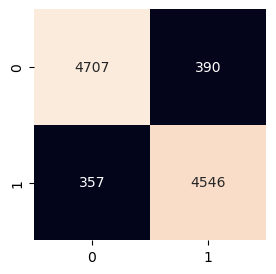

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      5097
           1       0.92      0.93      0.92      4903

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [61]:
evaluate_clf(y,yhat)

The accuracy is 0.93 which suggest model is well suited

In [75]:
#!pip install wordcloud

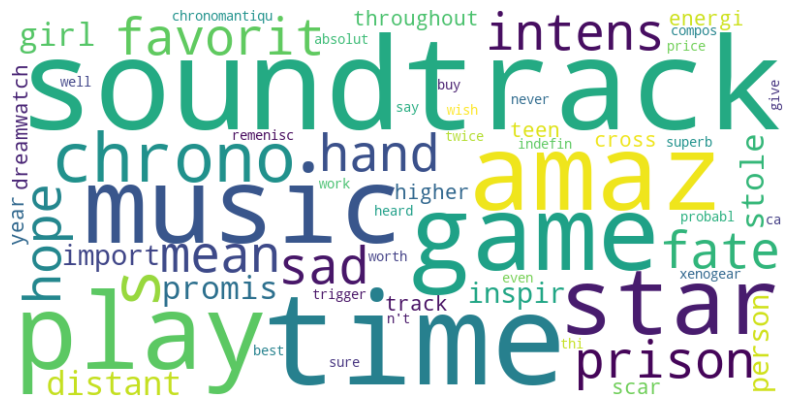

In [79]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(df.loc[2]['review'])
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

This word cloud highlights most used words. 
Wordcloud of whole dataframe is not possible hence here i am generating wordcloud for only 2nd review from dataset.

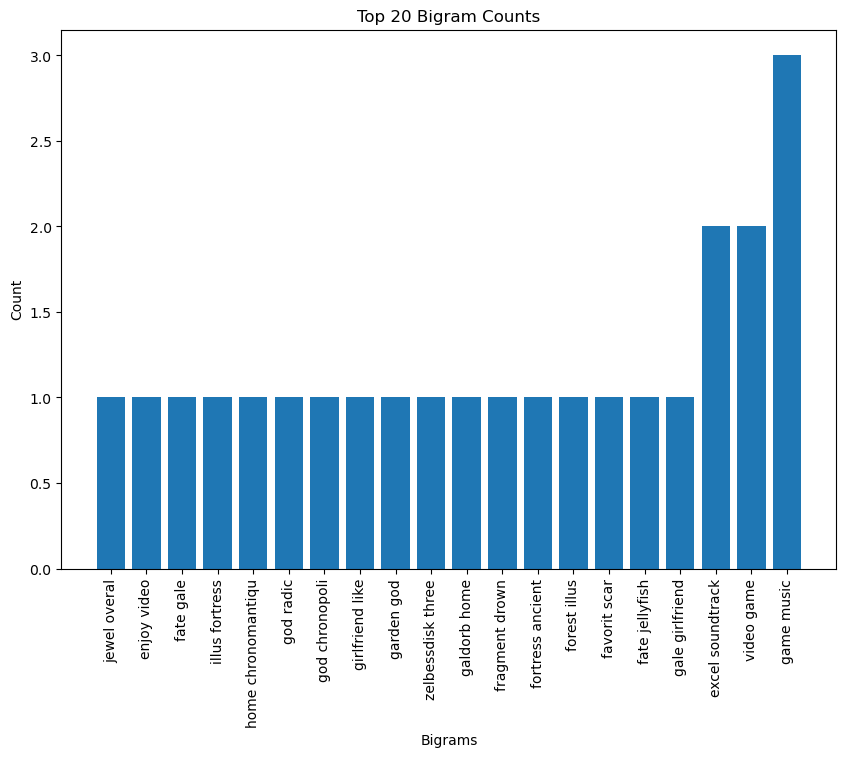

In [92]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object with ngram_range=(2, 2) to extract bigrams
vect = CountVectorizer(ngram_range=(2, 2))

# Fit the vectorizer to the document
counts = vect.fit_transform([df.loc[3]['review']])

# Get the vocabulary of the vectorizer
vocab = vect.get_feature_names_out()

# Get the top 20 bigram counts
top_20_bigrams = counts.toarray().sum(axis=0).argsort()[-20:]

# Create a bar chart of the top 20 bigram counts
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.bar(vocab[top_20_bigrams], counts.toarray()[0, top_20_bigrams])
plt.xticks(rotation=90)
plt.xlabel("Bigrams")
plt.ylabel("Count")
plt.title("Top 20 Bigram Counts")
plt.show()